#### Loading the data

In [2]:
import pandas as pd
df = pd.read_csv('review.csv')


In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### Remove all the Htmltags from the review feature
#### Remove all the HTML Tags

In [4]:
from bs4 import BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
df['review_tokens'] = df['review'].apply(remove_html_tags)


C:\Users\Tanvir Hasan\AppData\Local\Temp\ipykernel_17820\4173689955.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [5]:
print(df)

                                                  review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                           review_tokens  
0      One of the other reviewers has mentioned that ...  
1      A wonderful little production. The

#### Convert to lowercase

In [6]:
df = df.apply(lambda x:x.astype(str).str.lower())
print(df)

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production. <br /><br />the...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there's a family where a little boy ...  negative   
4      petter mattei's "love in the time of money" is...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i'm going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                           review_tokens  
0      one of the other reviewers has mentioned that ...  
1      a wonderful little production. the

#### Tokenisation

In [7]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['review sentiment']= df['review_tokens'].apply(lambda x:word_tokenize(x))

print(df[['review','review_tokens','review sentiment']])

[nltk_data] Downloading package punkt to C:\Users\Tanvir
[nltk_data]     Hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                  review  \
0      one of the other reviewers has mentioned that ...   
1      a wonderful little production. <br /><br />the...   
2      i thought this was a wonderful way to spend ti...   
3      basically there's a family where a little boy ...   
4      petter mattei's "love in the time of money" is...   
...                                                  ...   
49995  i thought this movie did a down right good job...   
49996  bad plot, bad dialogue, bad acting, idiotic di...   
49997  i am a catholic taught in parochial elementary...   
49998  i'm going to have to disagree with the previou...   
49999  no one expects the star trek movies to be high...   

                                           review_tokens  \
0      one of the other reviewers has mentioned that ...   
1      a wonderful little production. the filming tec...   
2      i thought this was a wonderful way to spend ti...   
3      basically there's a family where

#### remove stop words

In [8]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['review sentiment'] = df['review sentiment'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

print(df[['review','sentiment','review_tokens','review sentiment']])

[nltk_data] Downloading package stopwords to C:\Users\Tanvir
[nltk_data]     Hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production. <br /><br />the...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there's a family where a little boy ...  negative   
4      petter mattei's "love in the time of money" is...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i'm going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                           review_tokens  \
0      one of the other reviewers has mentioned that ...   
1      a wonderful little production. t

#### Implementing Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Convertthe "revies_tokens" column back to sentences
df['review_sentences'] = df['review sentiment'].apply(lambda tokens: ' '.join(tokens))

max_features = 1000
vectorizer = CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(df['review_sentences'])
# Create o Datofrane with the So representation
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer. get_feature_names_out())
# Concatenate the Bow Dataframe with the original Dotaframe
df = pd.concat([df, bow_df], axis=1)
# Display the final Datafrane
print(df)

                                                  review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production. <br /><br />the...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there's a family where a little boy ...  negative   
4      petter mattei's "love in the time of money" is...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i'm going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                           review_tokens  \
0      one of the other reviewers has mentioned that ...   
1      a wonderful little production. t

#### Then change the sentiment categorical column to numerical column

In [14]:
df['sentiment']= df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

df.head()

,review,sentiment,review_tokens,review sentiment,review_sentences,10,15,20,30,80,...,wrote,yeah,year,years,yes,yet,york,young,younger,zombie
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a wonderful little production. <br /><br />the...,1,a wonderful little production. the filming tec...,"[wonderful, little, production, ., filming, te...",wonderful little production . filming techniqu...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,basically there's a family where a little boy ...,0,basically there's a family where a little boy ...,"[basically, 's, family, little, boy, (, jake, ...",basically 's family little boy ( jake ) thinks...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,"petter mattei's ""love in the time of money"" is...",1,"petter mattei's ""love in the time of money"" is...","[petter, mattei, 's, ``, love, time, money, ''...",petter mattei 's `` love time money '' visuall...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### remove all the unnecessary columns from the dataset and check for null values

In [16]:
df.drop(['review', 'review_tokens','review sentiment','review_sentences'], axis=1, inplace=True)
df.head()

,sentiment,10,15,20,30,80,90,able,absolutely,across,...,wrote,yeah,year,years,yes,yet,york,young,younger,zombie
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df.isnull(). sum()

sentiment    0
10           0
15           0
20           0
30           0
            ..
yet          0
york         0
young        0
younger      0
zombie       0
Length: 1000, dtype: int64

#### train a decision tree model

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('sentiment',axis=1)
y= df['sentiment']
X_train, X_test, y_train,y_test = train_test_split(X , y, test_size= 0.2, random_state = 42)

#### Training a decision tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier()
# Fit the model to the training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### Then we did the evaluation for the model

In [23]:
# predict the Labels for the test data
y_pred = tree_clf.predict(X_test)
# Galculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
# print the accuracy ccone
print("Accuracy:", accuracy)

Accuracy: 0.7152


In [24]:
from sklearn.metrics import f1_score
# calculate the F1 score
f1= f1_score(y_test, y_pred)
#print the 71 score
print('F1 score:', f1)

F1 score: 0.716447630426125


#### Feature Importance

In [25]:
import matplotlib.pyplot as plt

feature_importance = tree_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

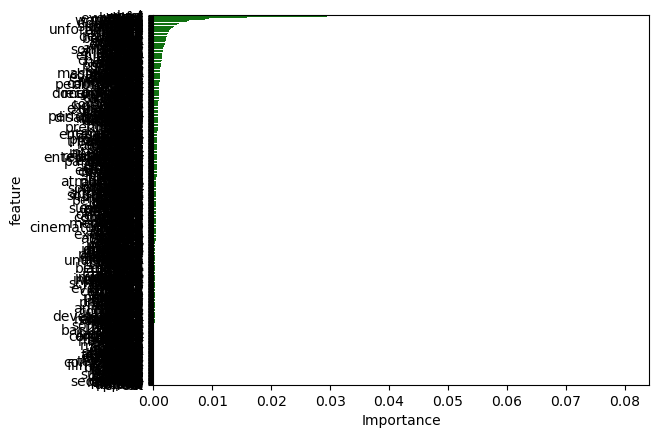

In [27]:
import seaborn as sns

sns.barplot(x='Importance',y='feature',data=feature_importance_df,color='green')
plt.show()

#### Top 15 features

In [28]:
top_15_features = feature_importance_df.sort_values(by='Importance',ascending=False).head(15)

print(top_15_features)

       feature  Importance
67         bad    0.080120
980      worst    0.050426
377      great    0.036259
943      waste    0.029539
63       awful    0.020306
276  excellent    0.016719
96      boring    0.015947
84        best    0.011468
593    nothing    0.009923
660       poor    0.009391
861   terrible    0.009287
832     stupid    0.008806
971  wonderful    0.008687
661     poorly    0.006742
514       love    0.006090
